# **ENGLISH PREMIER LEAGUE MODEL DEVELOPMENT, EVALUATION AND REFINEMENT**

Machine learning is an intelligent methodology that has demonstrated promising outcomes in the categorization and prediction sectors. 
Sports prediction is one of the growing areas that requires high predictive accuracy because of the enormous monetary investments involved in it. 
Predictions in football are generally either done depending on player performances or team performance as a whole.

## OBJECTIVE

The objective of this is to develop a model to predict players performance by predicting the total points expected 
from each player. 
It can also be used by team management to manage player expectations.

### ABOUT DATASET

This dataset was obtained from Kaggle datasets. it consists of 769 rows and 79 columns which are; 
1. **Id**: Unique identifier for each palyer 
2. **name**: Full name of the player 
3. **now_cost**: Current cost of the player in the game 
4. **position**: Position in which player plays 
5. **team**: Team that the player belongs to 
6. **web_name**: Name of the player as displayed on the website 
7. **transfers_in_event**: Number of transfers in for the player in the current event 
8. **influenec_rank_type**: Rank of the player based on their influence score 
9. **news_added**: Date and time when the latest news about player was added 
10. **ict_index_rank_type**: Rank based on the ICT index, a metric that combines influence, creativity and threaat 
11. **assists**: Number of assists provided by player 
12. **selected_rank**: Rank of player based on how many managers have selected them 
13. **direct_free_kicks_order**: Order of priority for taking direct free kicks 
14. **starts_per_90**: Number of starts per 90 minutes played 
15. **goals_conceded**: Number of goals conceded while the player was on the field 
16. **threat_rank_type**: Rank based on players threat score 
17. **status**: Current status of the player 
18. **ep_this**: Expected points for the current game week 
19. **news**: Latest news regarding the player 
20. **selected_rank_type**: Rank type based on the percentageof teams that have selected player 
21. **goals_scored**: Number of goals scored by player 
22. **influence_rank**: Players rank based on their influence 
23. **goals_conceded_per_90**: Average number of goals conceded per 90 minutes played 
24. **selected_by_percent**: Percentage of fantasy teams that have selected the player 
25. **in_dream_team**: indicates whether the player is in the dream team for the gameweek 
26. **points_per_game_rank**: Rank based on the average points scored per game 
27. **expected_goal_involvements_per_90**: Expected number of goals involved per 90 minutes played 
28. **influence**: Influence score, a metric reflecting the players impact on games 
29. **form_rank_type**: Rank bases on thr players form 
30. **expected_goals_conceded_per_90**: Expected goals conceded per 90 minutes played 
31. **chance_of_playing_this_round**: Probability that the player will play inthe current game week
32. **ep_next**: Expected points for the next gameweek 
33. **expected_assists**: Expected number of assists 
34. **expected_goals_conceded**: Expected number of goals 
35. **points_per_game**: Average points scored per game 
36. **cost_change_start**: Cost change from the start of the season 
37. **transfers_in**: Total number of transfers in for the player 
38. **starts**: Number of games the player has started
39. **cost_change_start_fall**: Decrease in cost from the start 
40. **creativity**: Creativity score, a metric reflecting the players ability to create goal scoring oppurtunities 
41. **saves_per_90**: Average number of saves per 90 minutes played 
42. **threat_rank**: Rank based on players threat score 
43. **penalties_saved**: Number of penalties saved by the player 
44. **points_per_game_rank_type**: Rank type based on points per game 
45. **own_goals**: Number of own goals scored by the player 
46. **bonus**: Bonus points awarded to the player 
47. **penalties_missed**: Numberof penalties missed by the player 
48. **expected_goals**: Expected number of goals 
49. **chance_of_playing_next_round**: Probability that the player will play in the next gameweek 
50. **event_points**: Points scored by the player in the current gameweek 
51. **clean_sheets**: Number of clean sheets kept by the player 
52. **clean_sheets_per_90**: Average number of clean sheets per 90 minutes played 
53. **value_season**: Value providedd by the player over the season 
54. **transfers_out_event**: Number of transfers out for thr player in the current event 
55. **form**: Players form, a measure of recent performance 
56. **bps**: Bonus points system score 
57. **saves**: Total number of saves made by the player 
58. **expected_goals_involvements**: Expected number of goals plus assists
59. **form_rank**: Rank based on the players form 
60. **creativity_rank**: Rank based on the players creativity 
61. **corners_and_indirect_free_kicks**: Order of priority for taking corners and indirect free kicks 
62. **threat**: Threat score, a metric reflecting the players likelihood to score 
63. **dream_team_count**: Number of times the player has been in the dream team 
64. **now_cost_rank_type**: Rank type now based on the players current cost 
65. **ict_index**: ICT index score, a metric combining influence, creativity and threat 
66. **now_cost_rank**: Rank based on the players current cost 
67. **minutes**: Total minutes played by the player 
68. **yellow_cards**: Number of yellow cards recieved by the player 
69. **cost_change_event_fall**: Cost decrease in the current event 
70. **red_cards**: Number of red cards recieved by the player 
71. **value_form**: Value provided by the player based on their form 
72. **ict_index_rank**: Rank based on ICT index 
73. **total_points**: Total points scored by the player


## **Import Required Libraries**

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor 
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score, f1_score, log_loss, r2_score, precision_recall_curve, roc_curve, auc, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report, precision_score, recall_score
import sklearn.metrics as metrics 
import warnings 
# suppress warnings 
warnings.filterwarnings("ignore")

+ Define plot for Confusion Matrix

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".2f", annot_kws = {"size": 10}) #annot=True to annotate cells
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels') 
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.title('Confusion Matrix'); 
    plt.show() 

+ Use pandas to read dataset to DataFrame

In [3]:
data = pd.read_csv("players.csv") 
data

,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,2,Cédric Alves Soares,39,DEF,Arsenal,Cédric,433,173,NaN,172,...,231,0.0,729,0,0,0,0,0.0,493,0
2,3,Mohamed Elneny,44,MID,Arsenal,M.Elneny,54,215,2023-12-12T22:30:08.433665Z,214,...,290,0.4,498,1,0,0,0,0.0,470,4
3,4,Fábio Ferreira Vieira,54,MID,Arsenal,Fábio Vieira,5,134,2023-12-07T12:00:08.489004Z,139,...,80,21.9,127,236,0,0,1,0.0,300,21
4,5,Gabriel dos Santos Magalhães,49,DEF,Arsenal,Gabriel,104278,42,2023-09-30T23:00:07.672676Z,47,...,31,43.3,247,1284,1,0,0,0.9,172,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,749,Matthew Whittingham,45,MID,Wolves,Whittingham,13,269,NaN,272,...,250,0.0,428,0,0,0,0,0.0,680,0
765,750,Tawanda Chirewa,45,MID,Wolves,Chirewa,20,277,NaN,280,...,258,0.0,441,0,0,0,0,0.0,693,0
766,751,Justin Hubner,40,DEF,Wolves,Hubner,151,217,NaN,217,...,211,0.0,703,0,0,0,0,0.0,579,0
767,769,Owen Hesketh,45,MID,Wolves,Hesketh,11,257,NaN,260,...,232,0.0,401,0,0,0,0,0.0,663,0


### Exploratory Data Analysis

+ View columns in the dataframe

In [4]:
data.columns.tolist()

['id',
 'name',
 'now_cost',
 'position',
 'team',
 'web_name',
 'transfers_in_event',
 'influence_rank_type',
 'news_added',
 'ict_index_rank_type',
 'assists',
 'selected_rank',
 'direct_freekicks_order',
 'starts_per_90',
 'goals_conceded',
 'threat_rank_type',
 'status',
 'ep_this',
 'news',
 'selected_rank_type',
 'goals_scored',
 'influence_rank',
 'goals_conceded_per_90',
 'selected_by_percent',
 'in_dreamteam',
 'points_per_game_rank',
 'expected_goal_involvements_per_90',
 'influence',
 'form_rank_type',
 'expected_goals_conceded_per_90',
 'chance_of_playing_this_round',
 'ep_next',
 'expected_assists',
 'expected_goals_conceded',
 'points_per_game',
 'cost_change_start',
 'transfers_in',
 'starts',
 'cost_change_start_fall',
 'creativity',
 'saves_per_90',
 'threat_rank',
 'penalties_saved',
 'points_per_game_rank_type',
 'own_goals',
 'bonus',
 'penalties_missed',
 'expected_goals',
 'chance_of_playing_next_round',
 'event_points',
 'clean_sheets',
 'clean_sheets_per_90',
 '

+ Use the info() method to gain information about the DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 79 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    769 non-null    int64  
 1   name                                  769 non-null    object 
 2   now_cost                              769 non-null    int64  
 3   position                              769 non-null    object 
 4   team                                  769 non-null    object 
 5   web_name                              769 non-null    object 
 6   transfers_in_event                    769 non-null    int64  
 7   influence_rank_type                   769 non-null    int64  
 8   news_added                            536 non-null    object 
 9   ict_index_rank_type                   769 non-null    int64  
 10  assists                               769 non-null    int64  
 11  selected_rank      

+ Handle missing values

In [6]:
data.dtypes[data.isnull().any()]

news_added                               object
direct_freekicks_order                  float64
news                                     object
chance_of_playing_this_round            float64
chance_of_playing_next_round            float64
penalties_order                         float64
corners_and_indirect_freekicks_order    float64
dtype: object

+ The decision to drop the following columns instead of filling them with values stems from the fact 
that this columns do not really impact the purpose of this analysis as well as trying to fill in the missing values. 
This columns contain missing values because not every player is in the news, takes free kicks or penalties, corners
or plays in every round of games.

In [7]:
columnsx =["id", "news", "news_added", "web_name", "event_points", "direct_freekicks_order", "chance_of_playing_this_round", "chance_of_playing_next_round", "penalties_order", "corners_and_indirect_freekicks_order"] 
data.drop(columns=columnsx, inplace=True)

In [8]:
print(data.isnull().values.sum())

0


+ The target of this model development is the total points column. It contains continous values
and in order to analyse it, it needs to be converted to categorical values and then to binary.

In [9]:
print(data["total_points"].value_counts())

total_points
0     272
1      31
2      21
21     14
18     14
     ... 
98      1
67      1
87      1
90      1
68      1
Name: count, Length: 91, dtype: int64


In [10]:
print(data["total_points"].describe())

count    769.000000
mean      18.781534
std       23.628783
min       -1.000000
25%        0.000000
50%        8.000000
75%       32.000000
max      137.000000
Name: total_points, dtype: float64


In [11]:
bins = [0, 8, 32, 50, 137]
labels = ["low", "medium", "high", "very_high",]

In [12]:
data["total_points_category"] = pd.cut(data["total_points"], bins=bins, labels=labels, right=False, include_lowest=True)

In [13]:
data["total_points_category"] = data["total_points_category"].cat.add_categories(["NaN"]).fillna("NaN")

In [14]:
data["total_points_category"] = data["total_points_category"].astype(str).str.strip().replace({"low": 0, "medium": 1, "high": 2, "very_high": 3, "NaN": -1}, inplace=False)

In [15]:
data = data[data["total_points_category"] != -1]

In [16]:
data["total_points_category"].isnull().any()

False

In [17]:
print(data["total_points_category"].value_counts())

total_points_category
0    377
1    190
3    101
2     98
Name: count, dtype: int64


In [18]:
np.unique(data["total_points_category"])

array([0, 1, 2, 3], dtype=int64)

+ Use the head() method to view Dataframe to ensure its properly constituted.

In [19]:
data.head()

,name,now_cost,position,team,transfers_in_event,influence_rank_type,ict_index_rank_type,assists,selected_rank,starts_per_90,...,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points,total_points_category
0,Folarin Balogun,44,FWD,Arsenal,0,61,63,0,325,0.00,...,0.0,528,0,0,0,0,0.0,628,0,0
1,Cédric Alves Soares,39,DEF,Arsenal,433,173,172,0,253,0.00,...,0.0,729,0,0,0,0,0.0,493,0,0
2,Mohamed Elneny,44,MID,Arsenal,54,215,214,1,438,0.00,...,0.4,498,1,0,0,0,0.0,470,4,0
3,Fábio Ferreira Vieira,54,MID,Arsenal,5,134,139,3,430,0.76,...,21.9,127,236,0,0,1,0.0,300,21,1
4,Gabriel dos Santos Magalhães,49,DEF,Arsenal,104278,42,47,0,21,0.98,...,43.3,247,1284,1,0,0,0.9,172,56,3


+ Identify the Categorical columns and use LabelEncoders to convert categorical data to 
numerical data

In [20]:
categorical_features = data.select_dtypes(include=["object"]).columns 
print(categorical_features)

Index(['name', 'position', 'team', 'status'], dtype='object')


In [21]:
label_encoders = {col: LabelEncoder().fit(data[col]) for col in categorical_features}
for col, le in label_encoders.items():
    data[col] = le.transform(data[col])

+ Define X and Y where X represents the feature matrix which includes the features used to 
predict the target variable, and Y represents the target variable for the prediction.

In [22]:
X = data.drop(columns=["total_points", "total_points_category"])
Y = data["total_points_category"]

+ Correlation matrix is used to show the correlation coefficients between the features. In this case a threshold 
is set to > 0.5 and the top 20 correlated features extracted to reduce the dimensionality of the dataset.

In [23]:
correlation_matrix = data.corr()

In [24]:
corr_target = correlation_matrix["total_points_category"].abs()

In [25]:
top_correlation = corr_target[corr_target > 0.5].sort_values(ascending=False).index

In [26]:
top_correlation = top_correlation[top_correlation != "total_points"]

In [27]:
top_correlation = top_correlation[top_correlation != "total_points_category"]

In [28]:
top_correlation = top_correlation[:20]

In [29]:
filtered_corr_matrix = correlation_matrix.loc[top_correlation, top_correlation]

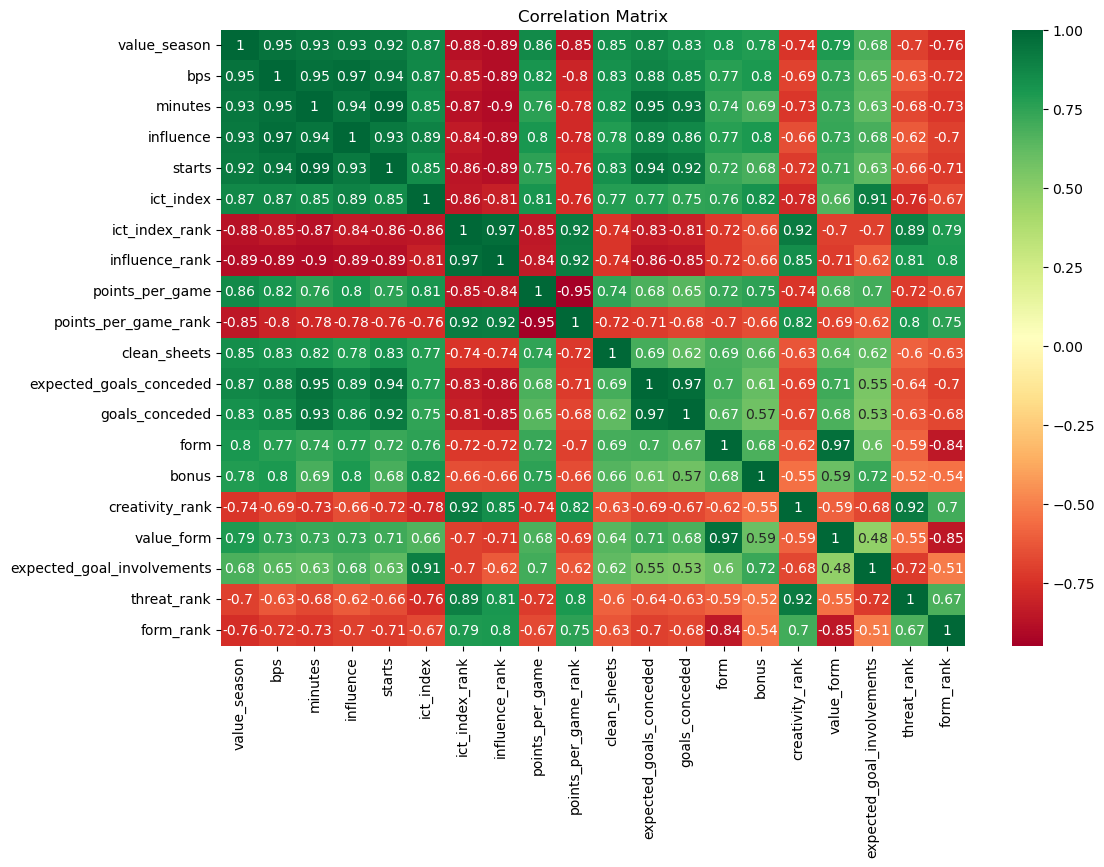

In [30]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(filtered_corr_matrix, annot=True, cmap="RdYlGn", annot_kws={"size": 10})
plt.xticks(rotation =90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Matrix") 
plt.show()

+ Define the X variable with the extracted top correlation features. Use train_test_split to 
split data into training and testing sets, Use RFG to perform feature importance to determine 
the significance of each feature in predicting the target variable. The threshold for important
features is set to 0.0005 to help understand which feature contributes most to the models prediction.

In [31]:
X_top = data[top_correlation]

In [32]:
numerical_features = X_top.select_dtypes(include=["int64", "float64"]).columns

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X_top, Y, test_size=0.2, random_state=42, stratify=Y) 
print("Train set:", X_train.shape, Y_train.shape) 
print("Test set:", X_test.shape, Y_test.shape)

Train set: (612, 20) (612,)
Test set: (154, 20) (154,)


In [34]:
scaler = StandardScaler() 
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features]) 
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [35]:
RFG = RandomForestRegressor() 
RFG.fit(X_train, Y_train)

RandomForestRegressor()

In [36]:
feature_imp = RFG.feature_importances_ 

In [37]:
importance_df = pd.DataFrame({
    "Feature": X_train.columns, 
    "Importance": feature_imp
}).sort_values(by="Importance", ascending=False) 
print(importance_df)

                       Feature  Importance
0                 value_season    0.947493
9         points_per_game_rank    0.012774
17  expected_goal_involvements    0.012662
5                    ict_index    0.004113
6               ict_index_rank    0.003993
8              points_per_game    0.003045
3                    influence    0.002162
18                 threat_rank    0.001879
7               influence_rank    0.001639
16                  value_form    0.001333
15             creativity_rank    0.001276
13                        form    0.001185
1                          bps    0.001026
19                   form_rank    0.000992
2                      minutes    0.000986
11     expected_goals_conceded    0.000944
10                clean_sheets    0.000844
4                       starts    0.000726
12              goals_conceded    0.000495
14                       bonus    0.000433


In [38]:
important_features = importance_df[importance_df["Importance"] > 0.0005]["Feature"].tolist() 
print(important_features)

['value_season', 'points_per_game_rank', 'expected_goal_involvements', 'ict_index', 'ict_index_rank', 'points_per_game', 'influence', 'threat_rank', 'influence_rank', 'value_form', 'creativity_rank', 'form', 'bps', 'form_rank', 'minutes', 'expected_goals_conceded', 'clean_sheets', 'starts']


+ After extracting the important features from feature importance, redefine the X variable with the important
features and use train_test_split to split it into training and testing sets.

In [39]:
X_imp = X_top[important_features]

In [40]:
Y_cat = data["total_points_category"]
print(Y_cat.dtypes)

int64


In [41]:
print(np.unique(Y_cat))

[0 1 2 3]


In [42]:
X_train_imp, X_test_imp, Y_train_imp, Y_test_imp = train_test_split(X_imp, Y_cat, test_size=0.2, random_state=42, stratify=Y) 
print("Train set:", X_train_imp.shape, Y_train_imp.shape) 
print("Test set:", X_test_imp.shape, Y_test_imp.shape) 

Train set: (612, 18) (612,)
Test set: (154, 18) (154,)


In [43]:
numerical_cols_in_train_imp = X_train_imp.select_dtypes(include=["int64", "float64"]).columns
X_train_imp[numerical_cols_in_train_imp] = scaler.fit_transform(X_train_imp[numerical_cols_in_train_imp]) 
X_test_imp[numerical_cols_in_train_imp] = scaler.transform(X_test_imp[numerical_cols_in_train_imp])

### **MODEL TRAINING AND DEVELOPMENT**

Use classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics.
specifically:
1. KNN
2. Decision Trees
3. Logistic Regression
4. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  precision 
6.  recall

+ Perform GridSearchCV for hyperparameter tuning, cross validation  to determine which combination provides
best performance.
+ plot confusion matrix to evaluate models performance across all classes, not just the overall accuracy.


In [44]:
SVM = Pipeline([("imputer", SimpleImputer()), ("scaler", StandardScaler()), ("svm", SVC())])

In [45]:
SVM.fit(X_train_imp, Y_train_imp)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('svm', SVC())])

In [46]:
predictions = SVM.predict(X_test_imp) 
predictions[0:5]

array([2, 0, 0, 0, 1], dtype=int64)

In [47]:
SVM_Accuracy_Score = metrics.accuracy_score(Y_test_imp, predictions) 
SVM_JaccardIndex = metrics.jaccard_score(Y_test_imp, predictions, average="weighted") 
SVM_F1_Score = metrics.f1_score(Y_test_imp, predictions, average="weighted")
SVM_precision = metrics.precision_score(Y_test_imp, predictions, average="weighted") 
SVM_recall = metrics.recall_score(Y_test_imp, predictions, average="weighted")
print("SVM_Accuracy_Score: %.2f" % SVM_Accuracy_Score) 
print("SVM_Jaccard_Index: %.2f" % SVM_JaccardIndex) 
print("SVM_F1_Score: %.2f" % SVM_F1_Score) 
print("SVM_Precison_score: %.2f" % SVM_precision) 
print("SVM_recall_score: %.2f" % SVM_recall)


SVM_Accuracy_Score: 0.93
SVM_Jaccard_Index: 0.87
SVM_F1_Score: 0.93
SVM_Precison_score: 0.93
SVM_recall_score: 0.93


In [48]:
param_grid = {
    "svm__C": [0.1, 1, 10, 100], 
    "svm__gamma": [1, 0.1, 0.01, 0.001], 
    "svm__kernel": ["rbf", "linear", "poly"] 
}

In [49]:
grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring="accuracy")
SVM_cv = grid_search.fit(X_train_imp, Y_train_imp)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [50]:
print("tuned hpyerparameters :(best parameters) ",SVM_cv.best_params_)
print("accuracy:",SVM_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
accuracy: 0.9395308543249368


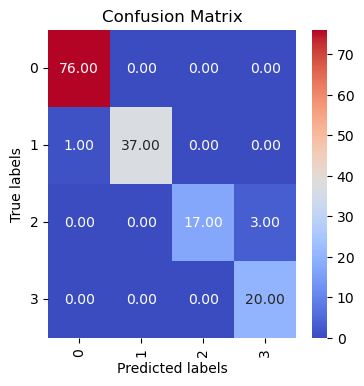

In [51]:
yhat=SVM_cv.predict(X_test_imp)
plot_confusion_matrix(Y_test_imp,yhat)

+ The SVM model performs excellently with high accuracy, precision, recall and balanced F1 score. Hyperparameter
tuning further enhanced the models accuracy. 
+ The confusion matrix shows that the model performs very well for class 0, but has issues distinguishing between
classes 2 and 3.

In [52]:
K = 4
KNN = KNeighborsClassifier(n_neighbors = K) 
KNN.fit(X_train_imp, Y_train_imp)


KNeighborsClassifier(n_neighbors=4)

In [53]:
predictions = KNN.predict(X_test_imp)
predictions[0:5]

array([2, 0, 0, 0, 1], dtype=int64)

In [54]:
KNN_Accuracy_Score = metrics.accuracy_score(Y_test_imp, predictions) 
KNN_JaccardIndex = metrics.jaccard_score(Y_test_imp, predictions, average="weighted") 
KNN_F1_Score = metrics.f1_score(Y_test_imp, predictions, average="weighted")
KNN_precision = metrics.precision_score(Y_test_imp, predictions, average="weighted") 
KNN_recall = metrics.recall_score(Y_test_imp, predictions, average="weighted")
print("KNN_Accuracy_Score : %.2f" % KNN_Accuracy_Score) 
print("KNN_JaccardIndex : %.2f" % KNN_JaccardIndex) 
print("KNN_F1_Score : %.2f" % KNN_F1_Score)
print("KNN_precision: %.2f" % KNN_precision)
print("KNN_recall: %.2f" % KNN_recall)


KNN_Accuracy_Score : 0.92
KNN_JaccardIndex : 0.86
KNN_F1_Score : 0.92
KNN_precision: 0.92
KNN_recall: 0.92


In [55]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [56]:
grid_search = GridSearchCV(KNN, parameters, cv=5) 
KNN_cv = grid_search.fit(X_train_imp, Y_train_imp)

In [57]:
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.9052512328401973


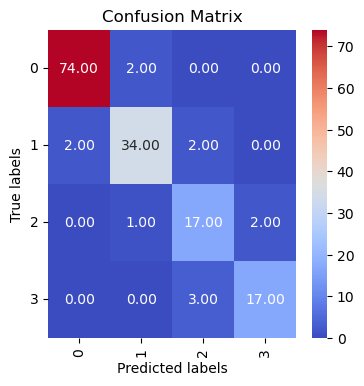

In [58]:
yhat = KNN_cv.predict(X_test_imp)
plot_confusion_matrix(Y_test_imp,yhat)

+ High accuracy indicates a strong overall performance, high precision and recall suggests that the model
is good at predicting the relevant instances and minimizing false positives. 
The F1 score confirms that the model balances precision and recall well.
A high cross validated score indicates stability and robustness. 
The confusion matrix shows that this model performs well with some minor misclassifications as it struggles
with distinguishing between class 1 and class 2 as well as class 2 and class 3.

In [59]:
LR = LogisticRegression(class_weight="balanced", multi_class="multinomial", solver="lbfgs", random_state=42) 
LR.fit(X_train_imp, Y_train_imp)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=42)

In [60]:
expected_classes = [0, 1, 2, 3]

In [61]:
predictions = LR.predict(X_test_imp)
predictions[0:5]

array([2, 0, 0, 0, 1], dtype=int64)

In [62]:
unique_classes = sorted(set(Y_test_imp)) 
num_classes = len(unique_classes)

In [63]:
LR_Accuracy_Score = metrics.accuracy_score(Y_test_imp, predictions) 
LR_JaccardIndex = metrics.jaccard_score(Y_test_imp, predictions, average="weighted", labels=unique_classes) 
LR_F1_Score = metrics.f1_score(Y_test_imp, predictions, average="weighted", labels=unique_classes)
LR_precision = metrics.precision_score(Y_test_imp, predictions, average="weighted", labels=unique_classes)
LR_recall = metrics.recall_score(Y_test_imp, predictions, average="weighted", labels=unique_classes)
print("LR Accuracy Score: %.2f" % LR_Accuracy_Score) 
print("LR Jaccard Index: %.2f" % LR_JaccardIndex) 
print("LR F1 Score: %.2f" % LR_F1_Score)
print("LR precision: %.2f" % LR_precision) 
print("LR recall: %.2f" % LR_recall)


LR Accuracy Score: 0.94
LR Jaccard Index: 0.88
LR F1 Score: 0.94
LR precision: 0.94
LR recall: 0.94


In [64]:
predict_probax = LR.predict_proba(X_test_imp)

In [65]:
Log_loss = log_loss(Y_test_imp, predict_probax, labels=unique_classes) 
print("LR Log loss: %.2f" % Log_loss)

LR Log loss: 0.17


In [66]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']} 
LR=LogisticRegression() 
grid_search = GridSearchCV(LR, parameters, cv=5)
LR_cv = grid_search.fit(X_train_imp, Y_train_imp)

In [67]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
LR=LogisticRegression()


In [68]:
print("tuned hpyerparameters :(best parameters) ",LR_cv.best_params_)
print("accuracy :",LR_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9101159536185526


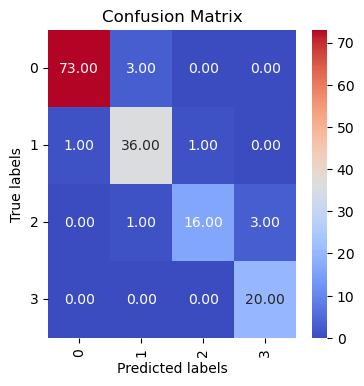

In [69]:
yhat=LR_cv.predict(X_test_imp)
plot_confusion_matrix(Y_test_imp,yhat)

+ This model has high accuracy, precision, recall and F1 scores, indicating an overall strong performance.
The confusion matrix shows some misclassifications between classes, especially class 1 and 1, and classes 2 and 3. 
However the model performs exceptionally well in predicting class 3 with no false positives and negatives. 
Its high performance suggeststhat the decision boundary between these classes might be relatively linear or that 
the features are well suited for the model.

In [70]:
Tree = Pipeline([("imputer", SimpleImputer()), ("scaler", StandardScaler()), ("clf", DecisionTreeClassifier())])

In [71]:
Tree.fit(X_train_imp, Y_train_imp)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [72]:
predictions = Tree.predict(X_test_imp) 
predictions[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [73]:
Tree_Accuracy_Score = metrics.accuracy_score(Y_test_imp, predictions) 
Tree_JaccardIndex = metrics.jaccard_score(Y_test_imp, predictions, average="weighted") 
Tree_F1_Score = metrics.f1_score(Y_test_imp, predictions, average="weighted")
Tree_precision = metrics.precision_score(Y_test_imp, predictions, average="weighted") 
Tree_recall = metrics.recall_score(Y_test_imp, predictions, average="weighted")
print("Tree_Accuracy_Score : %.2f" % Tree_Accuracy_Score) 
print("Tree_Jaccard_Index : %.2f" % Tree_JaccardIndex) 
print("Tree_F1_Score : %.2f" % Tree_F1_Score) 
print("Tree_precision : %.2f" % Tree_precision) 
print("Tree_recall : %.2f" % Tree_recall)


Tree_Accuracy_Score : 0.94
Tree_Jaccard_Index : 0.88
Tree_F1_Score : 0.93
Tree_precision : 0.93
Tree_recall : 0.94


In [74]:
param_grid = {"clf__criterion": ["gini", "entropy"], 
              "clf__max_depth": [None, 10, 20, 30], 
              "clf__min_samples_split": [2, 5, 10], 
              "clf__min_samples_leaf": [1, 2, 4], 
              "clf__max_features": [None, "sqrt", "log2"] 
             }
              
             

In [75]:
grid_search = GridSearchCV(estimator=Tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring="accuracy")
Tree_cv = grid_search.fit(X_train_imp, Y_train_imp)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [76]:
print("tuned hpyerparameters :(best parameters) ",Tree_cv.best_params_)
print("accuracy :",Tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10}
accuracy : 0.9476609356257496


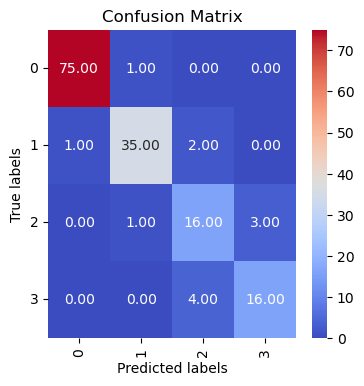

In [77]:
yhat = Tree_cv.predict(X_test_imp)
plot_confusion_matrix(Y_test_imp,yhat)

+ Decision Tree Classifier has performed well across all classes with high accuracy. 
+ Confusion matric shows some misclassificationissues between class 0 and 1 and class 2 and 3.
this may be due to similarity between classes 
+ High precision and recall shows that the classifier has a good balance. Jaccard and F1 scores suggest
the model is robust in its predictions across different classes.
+ The model seems to be perfroming quite well and the metrics indicate good predictive power.

In [78]:
truelabels = np.unique(Y_train_imp)

In [79]:
print(Y_test_imp.shape)

(154,)


### **FURTHER EVALUATION OF MODELS USING PRECISION RECALL CURVE AND ROC CURVE**

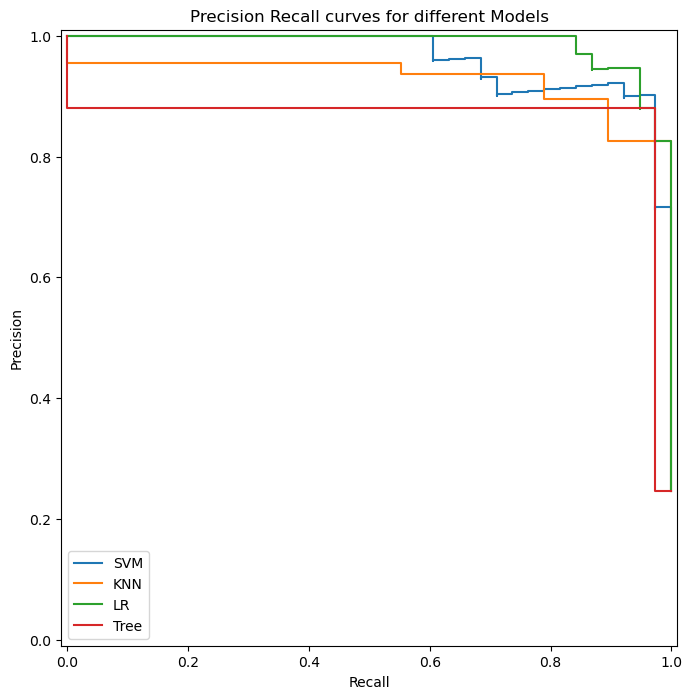

In [80]:
models = [
    ("SVM", SVC(probability=True, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("LR", LogisticRegression(random_state=42, max_iter=1000)),
    ("Tree", DecisionTreeClassifier(random_state=42))
]
plt.figure(figsize=(10, 8)) 
for name, model in models:
    model.fit(X_train_imp, Y_train_imp)
    if name == "SVM":
        Y_scores = model.decision_function(X_test_imp)[:, 1]
    else:
        Y_scores = model.predict_proba(X_test_imp)[:, 1]
    precision, recall, _ = precision_recall_curve(Y_test_imp, Y_scores, pos_label=1)
    display = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name=name)
    display.plot(ax=plt.gca()) 
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall curves for different Models") 
plt.legend(loc="best") 
plt.show()

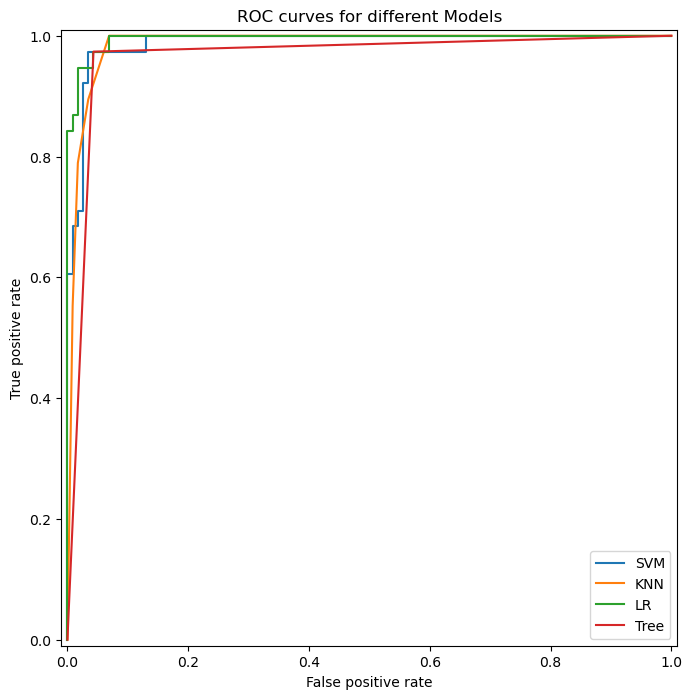

In [81]:
models = [
    ("SVM", SVC(probability=True, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("LR", LogisticRegression(random_state=42, max_iter=1000)),
    ("Tree", DecisionTreeClassifier(random_state=42))
]
plt.figure(figsize=(10, 8)) 
for name, model in models:
    model.fit(X_train_imp, Y_train_imp)
    if name == "SVM":
        Y_scores = model.decision_function(X_test_imp)[:, 1]
    else:
        Y_scores = model.predict_proba(X_test_imp)[:, 1]
    fpr, tpr, _ =roc_curve(Y_test_imp, Y_scores, pos_label=1)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=name)
    display.plot(ax=plt.gca()) 
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curves for different Models") 
plt.legend(loc="best") 
plt.show()

**PRECISION RECALL CURVE** 
+ All the models represented in the graph have curves that are close to the top right corner of the plot.
this indicates high precision and recall across all models. 
+ The curves of SVM, KNN, LR and Tree are close or overlapping which implies that their performance in terms of
precision and recall are similar. 
+ The flat top parts of the curves suggest that precision remains the same even when recall changes , up to a 
certain point. This is indicative of a consistent ability to correctly predict positive instances across different 
threshold settings. 
+ Sharp drop off is noticeable for some models at higher recall levels which indicates that precision falls sharply
when the model attemps to capture more positive instances. 
+ model performances are similar. 

**ROC CURVE** 
+ All the models have ROC curves that rise quickly towards the top left corner of the plot. This suggests that 
the models have high Area Under the Curve(AUC), and indicates good overall perrformance. 
+ The curves on the model are close to each other implying that their performancein distinguishing between the positive and negative classes is quite similar. 
+ The sharp rise of the curves at the begining indicates that low false positive rates are achieved for all models. 
+ The fact that the curves approach close to a true positive rate (TPR) of 0.1 suggests that the classifiers have
good sensitivity and are capable of detecting most of the true positive instances.

In [82]:
N = None
Report ={"KNN":[KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score, N, KNN_precision, KNN_recall, KNN_cv.best_score_],  
        "Tree":[Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, N, Tree_precision, Tree_recall, Tree_cv.best_score_], 
          "LR":[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, Log_loss, LR_precision, LR_recall, LR_cv.best_score_],  
          "SVM":[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score, N, SVM_precision, SVM_recall, SVM_cv.best_score_]} 
pd.DataFrame(Report, index = ["Accuracy", "JaccardIndex", "F1_Score", "Log_Loss", "Precision", "Recall", "CV_score"])

,KNN,Tree,LR,SVM
Accuracy,0.922078,0.935065,0.935065,0.928571
JaccardIndex,0.860777,0.881913,0.883157,0.869748
F1_Score,0.921650,0.933153,0.935404,0.928759
Log_Loss,NaN,NaN,0.172326,NaN
Precision,0.924705,0.934910,0.937109,0.929064
Recall,0.922078,0.935065,0.935065,0.928571
CV_score,0.905251,0.947661,0.910116,0.939531


+ From the above model development and evalaution the best model to use in predicting players perfomance by 
predicting players total points would be **Logistic Regression**. 
This model appears to be the best model overall as it consistently scores the highest across most perfomance metrics.

**SAVE AND LOAD TRAINED LOGISTIC REGRESSION MODEL AND TEST IT ON THE VALIDATION OR TEST SET
TO ENSURE IT WORKS AS EXPECTED**

In [83]:
import joblib

In [84]:
LogisticReg_model = LR_cv.best_estimator_

In [85]:
joblib.dump(LogisticReg_model, "LogisticReg_model.pkl")

['LogisticReg_model.pkl']

In [86]:
LogisticReg_model = joblib.load("LogisticReg_model.pkl")

In [87]:
Log_pred = LogisticReg_model.predict(X_test_imp)

In [88]:
print(classification_report(Y_test_imp, Log_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.90      0.95      0.92        38
           2       0.94      0.80      0.86        20
           3       0.87      1.00      0.93        20

    accuracy                           0.94       154
   macro avg       0.92      0.93      0.92       154
weighted avg       0.94      0.94      0.94       154



+ **Next steps would be model deployment**